In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# 1. CHARGEMENT
data = pd.read_csv('train.csv')

# 2. PRÉPARATION (X et y)
y = data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr']
X = data[features]

# --- L'ÉTAPE CRUCIALE POUR KNN : LE SCALING ---
# On transforme les données pour qu'elles soient sur la même échelle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SPLIT (Entraînement / Validation)
train_X, val_X, train_y, val_y = train_test_split(X_scaled, y, random_state=1)

# 4. MODÈLE KNN
# On demande l'avis des 5 voisins les plus proches
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(train_X, train_y)

# 5. TEST ET ERREUR
predictions = knn_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)

print(f"✅ Succès ! L'erreur moyenne (MAE) avec KNN est de : {mae:,.0f} $")

✅ Succès ! L'erreur moyenne (MAE) avec KNN est de : 23,124 $


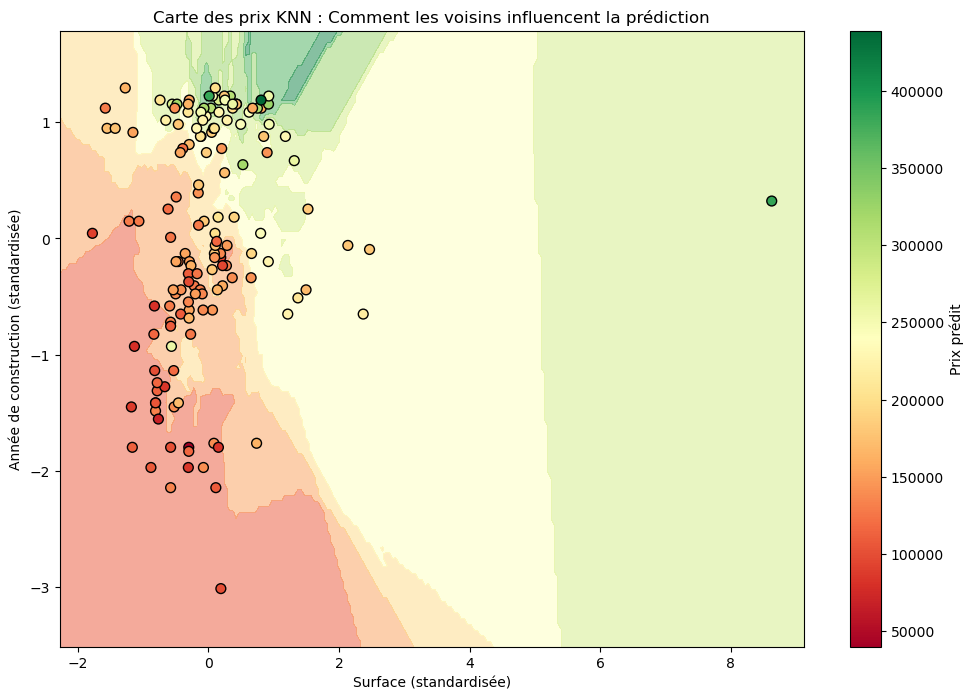

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# --- 1. CHARGEMENT ET PRÉPARATION ---
data = pd.read_csv('train.csv').head(150) # On prend 150 maisons pour la clarté
X = data[['LotArea', 'YearBuilt']]
y = data['SalePrice']

# --- 2. MISE À L'ÉCHELLE (SCALING) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. LE MODÈLE KNN ---
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_scaled, y)

# --- 4. CRÉATION D'UNE GRILLE DE PRÉDICTION ---
# On crée un "tapis" de points pour couvrir tout le graphique
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# On prédit le prix pour chaque point de ce tapis
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- 5. AFFICHAGE DU GRAPHIQUE ---
plt.figure(figsize=(12, 8))

# On dessine les zones colorées
plt.contourf(xx, yy, Z, cmap='RdYlGn', alpha=0.5) 

# On dessine les vraies maisons (les points)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='RdYlGn', edgecolors='black', s=50)

plt.title("Carte des prix KNN : Comment les voisins influencent la prédiction")
plt.xlabel("Surface (standardisée)")
plt.ylabel("Année de construction (standardisée)")
plt.colorbar(label='Prix prédit')
plt.show()